   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


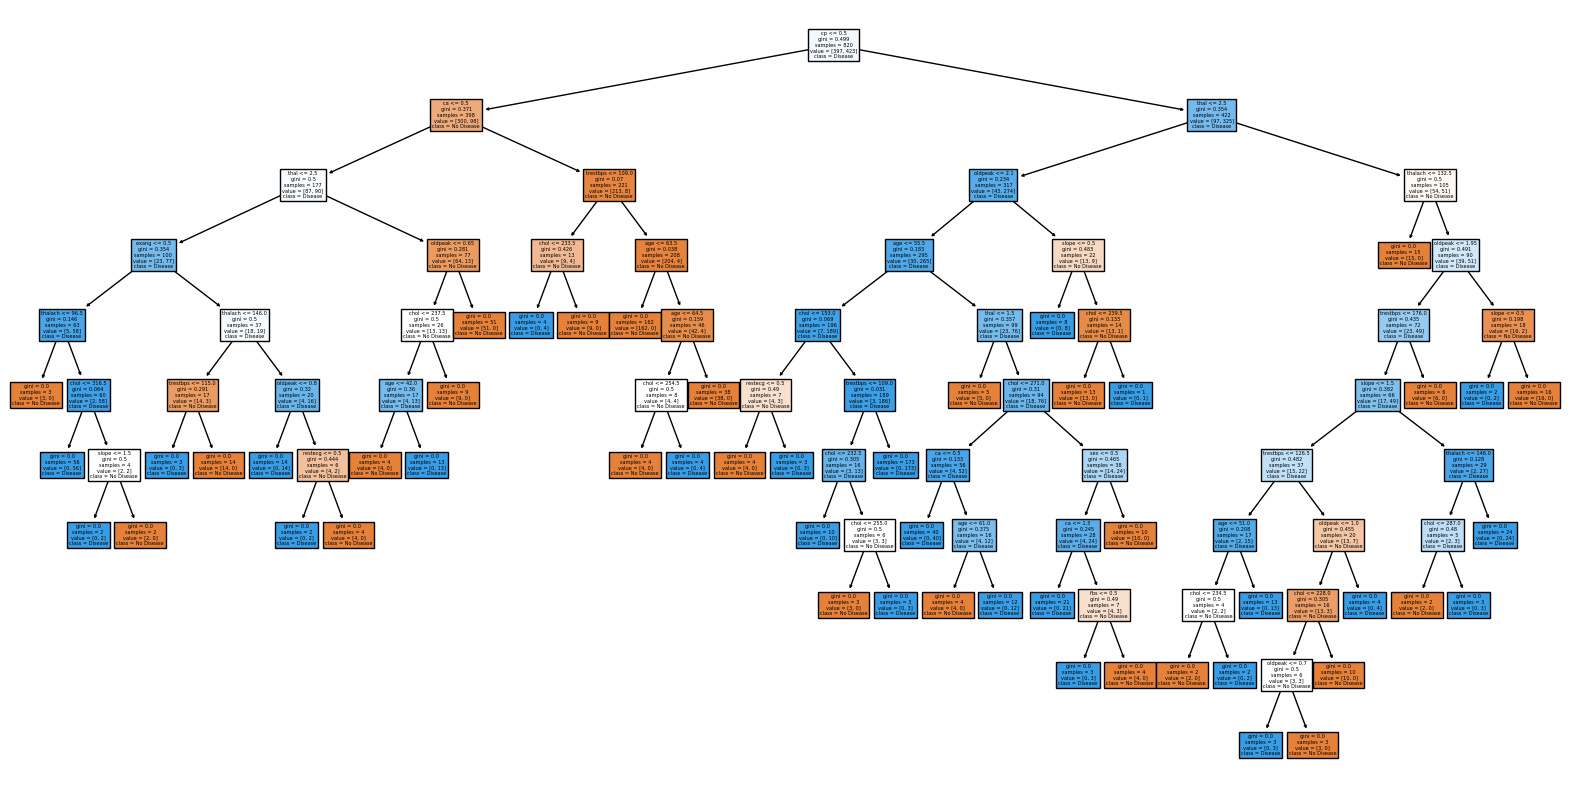

In [1]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("/kaggle/input/heart-disease-dataset/heart.csv") 
print(df.head())

# Features and target
X = df.drop('target', axis=1)
y = df['target']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Visualize tree
plt.figure(figsize=(20,10))
plot_tree(dtree, feature_names=X.columns, class_names=["No Disease","Disease"], filled=True)
plt.show()


In [2]:
# Default tree performance
print("Train Accuracy:", dtree.score(X_train, y_train))
print("Test Accuracy:", dtree.score(X_test, y_test))

# Controlling tree depth
dtree_limited = DecisionTreeClassifier(max_depth=3, random_state=42)
dtree_limited.fit(X_train, y_train)

print("Train Accuracy (limited depth):", dtree_limited.score(X_train, y_train))
print("Test Accuracy (limited depth):", dtree_limited.score(X_test, y_test))


Train Accuracy: 1.0
Test Accuracy: 0.9853658536585366
Train Accuracy (limited depth): 0.8512195121951219
Test Accuracy (limited depth): 0.7804878048780488


In [3]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Random Forest Train Accuracy:", rf.score(X_train, y_train))
print("Random Forest Test Accuracy:", rf.score(X_test, y_test))


Random Forest Train Accuracy: 1.0
Random Forest Test Accuracy: 0.9853658536585366


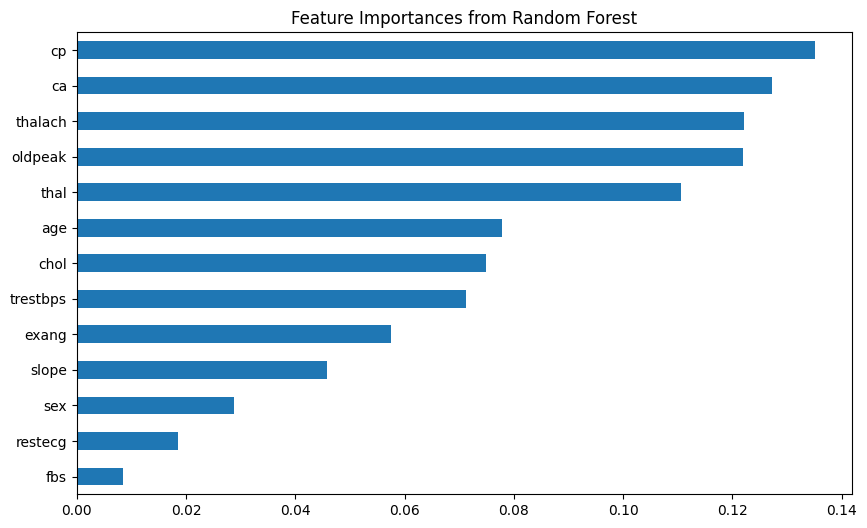

In [4]:
importances = rf.feature_importances_
feat_importances = pd.Series(importances, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title("Feature Importances from Random Forest")
plt.show()


In [5]:
from sklearn.model_selection import cross_val_score

# Cross-validation on Random Forest
scores = cross_val_score(rf, X, y, cv=5)
print("Cross-validation scores:", scores)
print("Mean CV accuracy:", scores.mean())


Cross-validation scores: [1.         1.         1.         1.         0.98536585]
Mean CV accuracy: 0.9970731707317073
